,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Text(0, 0.5, 'number of update')

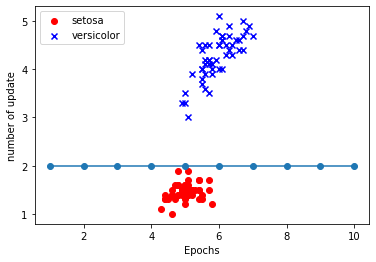

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
df.tail()

#ex
y=df.iloc[0:100,4].values
y=np.where(y=="Iris-setosa",-1,1)
print(y)
X=df.iloc[0:100,[0,2]].values
print(type(X),type(y))
plt.scatter(X[:50,0],X[:50,1],color="red",marker="o",label="setosa")
plt.scatter(X[50:100,0],X[50:100,1],color="blue",marker="x",label="versicolor")
plt.xlabel("sepal length[cm]")
plt.ylabel("petal length[cm]")
plt.legend(loc="upper left")
from perceptron import Perceptron
ppn=Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker="o")
plt.xlabel("Epochs")
plt.ylabel("number of update")


NameError: name 'X' is not defined

(100, 2)
(100,)
(100, 2)
(100,)


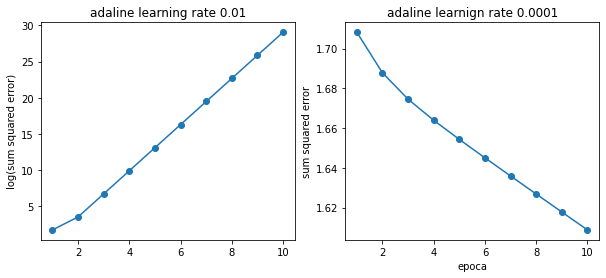

In [11]:
from adaline import AdalineGD
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ada1=AdalineGD(n_iter=10,eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.const_)+1),np.log10(ada1.const_),marker="o")
ax[0].set_label("Eplochs")
ax[0].set_ylabel("log(sum squared error)")
ax[0].set_title("adaline learning rate 0.01")
ada2=AdalineGD(n_iter=10,eta=0.0001).fit(X,y)
ax[1].set_xlabel("epoca")
ax[1].set_ylabel("sum squared error")
ax[1].set_title("adaline learnign rate 0.0001")
ax[1].plot(range(1,len(ada2.const_)+1),np.log10(ada2.const_),marker="o")


In [13]:
x_std=np.copy(X)
x_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
x_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()

(100, 2)
(100,)


Text(0, 0.5, 'sum squared error')

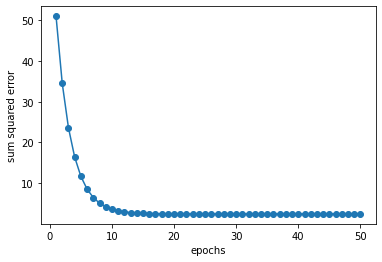

In [18]:
ada=AdalineGD(n_iter=50,eta=0.01)
ada.fit(x_std,y)
plt.plot(range(1,len(ada.const_)+1),ada.const_,marker="o")
plt.xlabel("epochs")
plt.ylabel("sum squared error")